### Logfile plot
This script allows you to generate the necessary plots for Lab06. </br>
You can simply run all cells below until the next markdown cell and follow the instructions written there.

In [43]:
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
import re

In [44]:
def load_data(file_path: str):
    # unpack data into variables directly
    t, x_ref, y_ref, vx_ref, vy_ref, x_raw, y_raw, x, y, vx_raw, vy_raw, vx, vy = np.loadtxt(file_path, skiprows = 5, unpack=True, delimiter = " ")
    t = (t - t[0])/1e6 # convert microseconds to seconds

    with open(file_path, 'r') as f:
        headers = f.readlines()[:2]

    task = int(re.findall("\d", headers[0])[0]) # task selection
    weights = re.findall("\d+.\d+", headers[1]) #kp, kd, ki
    return t, x_ref, y_ref, vx_ref, vy_ref, x_raw, y_raw, x, y, vx_raw, vy_raw, vx, vy, task, weights

In [45]:
def step_response(file_path: str):

    t, x_ref, y_ref, vx_ref, vy_ref, x_raw, y_raw, x, y, vx_raw, vy_raw, vx, vy, task, weights = load_data(file_path)

    fig, ax = plt.subplots(1, 1, figsize=(10,8))

    fig.suptitle(file_path[:-4], fontsize=15)
    ax.set_title("Step Response Underdamped")

    ax.set_ylabel("position [mm]")
    ax.set_xlabel("time [s]")

    ax.plot(t,x_ref,'--k', label = 'Reference')
    ax.plot(t,x_raw, color='royalblue', alpha=0.4, linewidth=2, label='Unfiltered')
    ax.plot(t,x,     color='royalblue', alpha=1, linewidth=2, label='Filtered')
    ax.set_xlim([0,10])
    ax.grid(color='k', linestyle=':', linewidth=1, alpha =0.8)

    if task == 6:
        ax.text(9, 80, f"$K_p$: {weights[0]}\n$K_d$: {weights[1]}\n$K_i$: {weights[2]}", fontsize=12, bbox=dict(facecolor='white', alpha=1))
        ax.legend(loc='lower left')

    if task == 5:
        ax.plot(t, 85*np.ones(len(t)), ':k', linewidth=2, label='Error Limit')
        ax.plot(t, 75*np.ones(len(t)), ':k', linewidth=2)
        ax.text(9, 15, f"$K_p$: {weights[0]}\n$K_d$: {weights[1]}\n$K_i$: {weights[2]}", fontsize=12, bbox=dict(facecolor='white', alpha=1))
        ax.legend()

    

In [46]:
def overview(file_path: str):
    t, x_ref, y_ref, vx_ref, vy_ref, x_raw, y_raw, x, y, vx_raw, vy_raw, vx, vy, task, weights = load_data(file_path)

    fig, axs = plt.subplots(2,2, figsize = (10, 8))
    fig.suptitle('Overview')

    for ax in axs:
        for a in ax:
            a.set_xlim([0, 10])
            a.grid(color='k', linestyle=':', linewidth=1, alpha =0.8)

    pos_range = np.linspace(0, 120, 7)
    vel_range = np.linspace(-500, 500, 11)

    axs[0][0].plot(t,x_ref,'--k', label = 'Reference')
    axs[0][0].plot(t,x_raw, color='royalblue', alpha=0.4, linewidth=4, label='Unfiltered')
    axs[0][0].plot(t,x,     color='royalblue', alpha=1, linewidth=2, label='Filtered')
    axs[0][0].set_title('x-position')
    axs[0][0].set_yticks(pos_range)
    axs[0][0].set_yticklabels(pos_range)
    # axs[0][0].set_xlabel('Time [s]')
    axs[0][0].set_ylabel('Position [mm]')

    axs[0][1].plot(t,y_ref,'--k', label = 'Reference')
    axs[0][1].plot(t,y_raw, color='royalblue', alpha=0.4, linewidth=4, label='Unfiltered')
    axs[0][1].plot(t,y,     color='royalblue', alpha=1, linewidth=2, label='Filtered')
    axs[0][1].set_title('y-position')
    axs[0][1].set_yticks(pos_range)
    axs[0][1].set_yticklabels(pos_range)
    # axs[0][1].set_xlabel('Time [s]')
    # axs[0][1].set_ylabel('Position [mm]')

    axs[1][0].plot(t,vx_ref,'--k', label = 'Reference')
    axs[1][0].plot(t,vx_raw, color='orange', alpha=0.4, linewidth=4, label='Unfiltered')
    axs[1][0].plot(t,vx,     color='orange', alpha=1, linewidth=2, label='Filtered')
    axs[1][0].set_title('x-velocity')
    axs[1][0].set_yticks(vel_range)
    axs[1][0].set_yticklabels(vel_range)
    axs[1][0].set_xlabel('Time [s]')
    axs[1][0].set_ylabel('Velocity [mm/s]')

    axs[1][1].plot(t,vy_ref,'--k', label = 'Reference')
    axs[1][1].plot(t,vy_raw, color='orange', alpha=0.4, linewidth=4, label='Unfiltered')
    axs[1][1].plot(t,vy,     color='orange', alpha=1, linewidth=2, label='Filtered')
    axs[1][1].set_title('y-velocity')
    axs[1][1].set_yticks(vel_range)
    axs[1][1].set_yticklabels(vel_range)
    axs[1][1].set_xlabel('Time [s]')
    # axs[1][1].set_ylabel('Velocity [mm/s]')

    fig.tight_layout()

In [47]:
def ball_trajectory(file_path: str):
    t, x_ref, y_ref, vx_ref, vy_ref, x_raw, y_raw, x, y, vx_raw, vy_raw, vx, vy, task, weights = load_data(file_path)

    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_title('Trajectory')

    t = np.linspace(0, 2*np.pi)
    ax.plot(80*np.sin(t), 80*np.cos(t),'--k')
    ax.plot(60*np.sin(t), 60*np.cos(t),'--k')
    ax.plot(100*np.sin(t), 100*np.cos(t),'--k')
    ax.plot(20*np.sin(t), 20*np.cos(t),'--k')
    ax.plot(20*np.sin(t) + 80, 20*np.cos(t),'--k')
    ax.plot(20*np.sin(t) - 80, 20*np.cos(t),'--k')
    ax.plot(20*np.sin(t), 20*np.cos(t) + 80,'--k')
    ax.plot(20*np.sin(t), 20*np.cos(t) - 80,'--k')

    ax.set_xlabel('x [mm]')
    ax.set_ylabel('y [mm]')
    ax.grid(color='k', linestyle=':', linewidth=1, alpha =0.8)

    ax.plot(x_raw,y_raw,color='royalblue', linewidth=2, alpha=0.4)
    ax.plot(x,y,color='royalblue', linewidth=2, alpha=1)
    
    fig.tight_layout()

In [52]:
file_path = widgets.Text(
                value='',
                placeholder='Write file path here',
                description='File path:',
                disabled=False
)
display(file_path)

Text(value='', description='File path:', placeholder='Write file path here')

Enter the file path of the `.txt` file that must be accessed in the cell above, then run the code cell below to generate the necessary plots.

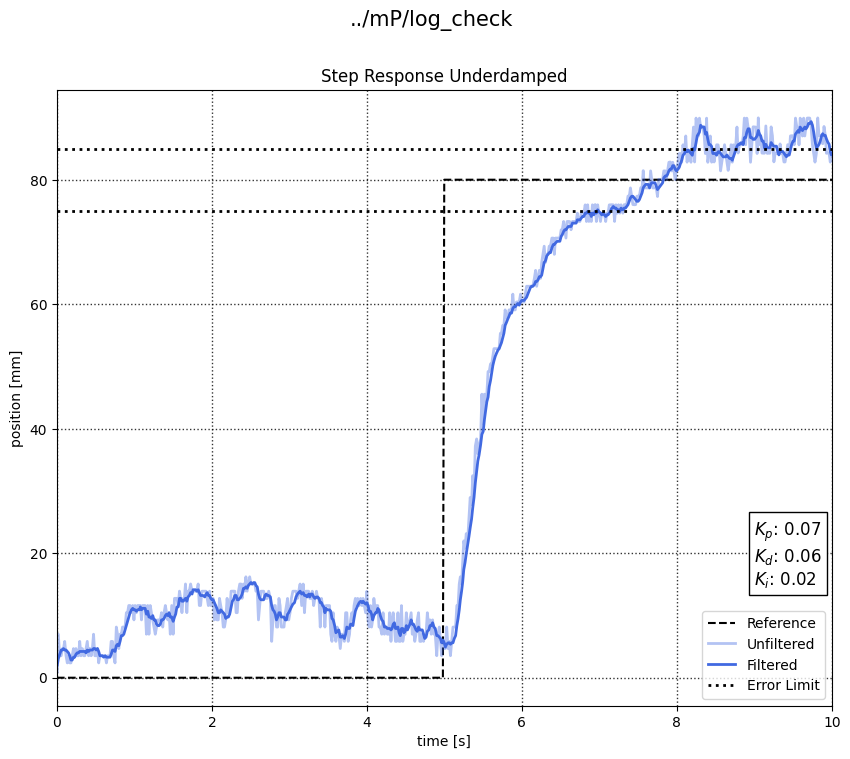

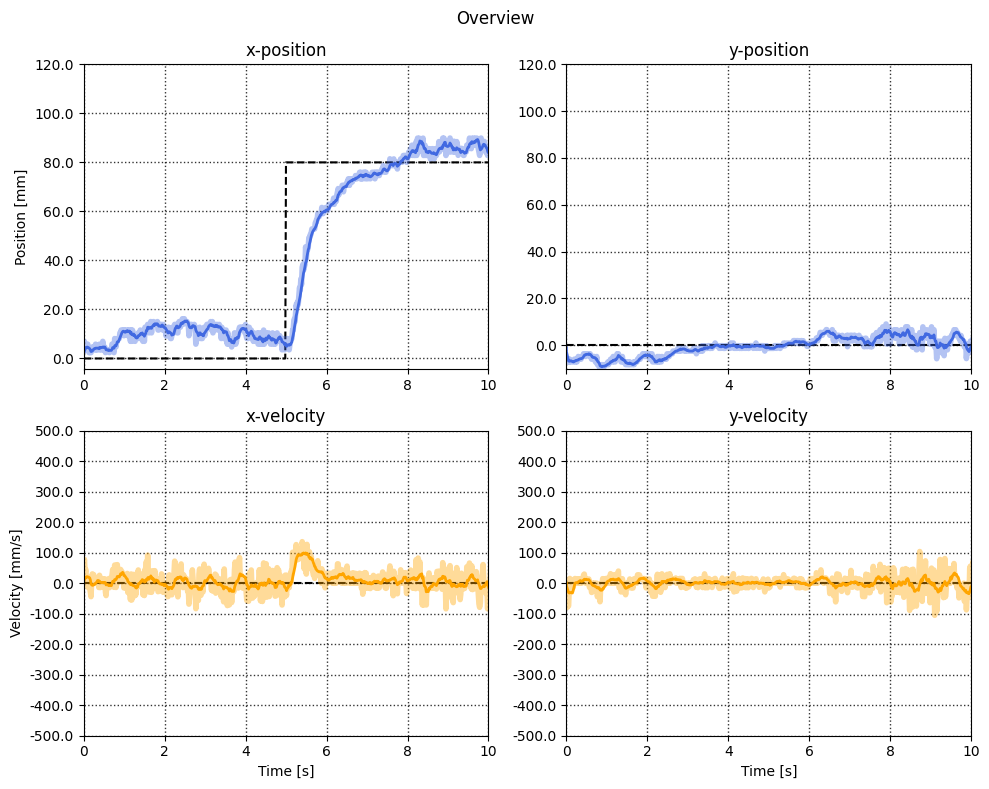

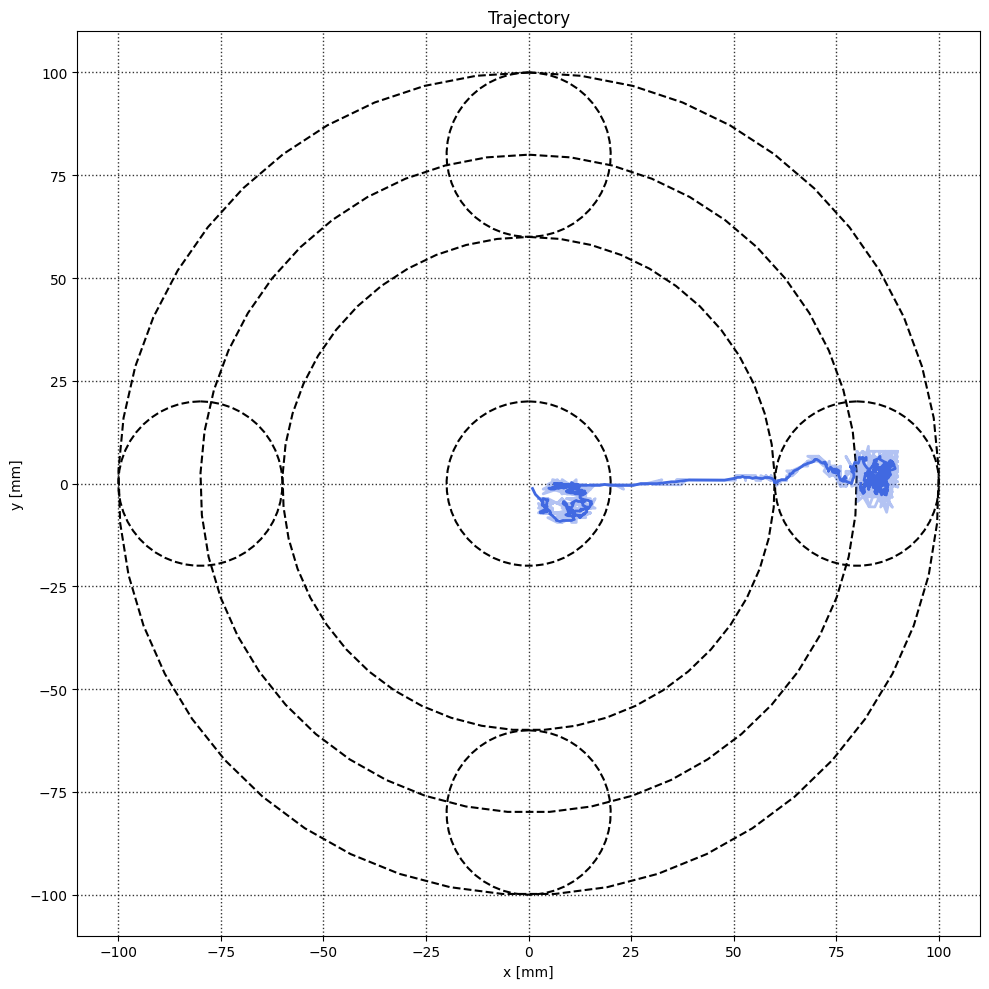

In [69]:
step_response(file_path.value)
overview(file_path.value)
ball_trajectory(file_path.value)